<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/artigo_6_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install yfinance tensorflow matplotlib seaborn --quiet

# 📚 Importações
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K



In [26]:
# --- Dados da PETR4 ---
print("--- 1. Baixando dados da PETR4 ---")
tickers = ['PETR4.SA']
# Usaremos um período maior para ter mais dados para o treinamento do autoencoder
start_date = '2023-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

dados_petr4 = yf.download(tickers, start=start_date, end=end_date)

if dados_petr4.empty:
    print("Erro: Não foi possível baixar os dados de PETR4.SA. Verifique o ticker ou a conexão.")
else:
    print("Dados de PETR4.SA baixados com sucesso!")
    print(dados_petr4.head())

[*********************100%***********************]  1 of 1 completed

--- 1. Baixando dados da PETR4 ---
Dados de PETR4.SA baixados com sucesso!
Price           Close       High        Low       Open     Volume
Ticker       PETR4.SA   PETR4.SA   PETR4.SA   PETR4.SA   PETR4.SA
Date                                                             
2023-01-02  14.225430  14.777813  14.150950  14.610237   78424700
2023-01-03  13.865449  14.337147  13.735111  14.237843   96750300
2023-01-04  14.306114  14.641269  13.548915  13.629599  129504000
2023-01-05  14.821258  14.920564  14.368179  14.486104   73886000
2023-01-06  14.734366  15.094347  14.616442  14.858498   51851500



--- 2. Pré-processamento dos Dados ---
Primeiros 5 retornos diários:
              Return
Date                
2023-01-03 -0.025305
2023-01-04  0.031782
2023-01-05  0.036009
2023-01-06 -0.005863
2023-01-09  0.005476
Total de amostras de retornos: 605

Primeiros 5 retornos diários normalizados:
              Return  Scaled_Return
Date                               
2023-01-03 -0.025305       0.402749
2023-01-04  0.031782       0.750824
2023-01-05  0.036009       0.776598
2023-01-06 -0.005863       0.521297
2023-01-09  0.005476       0.590432


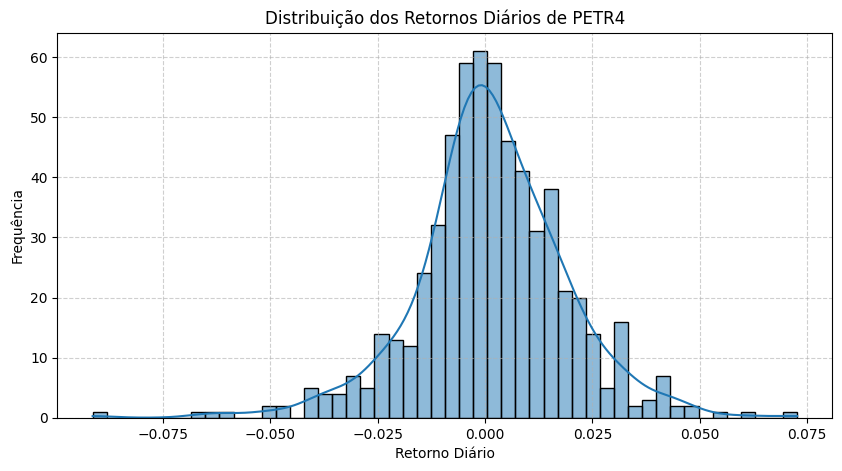

In [33]:
print("\n--- 2. Pré-processamento dos Dados ---")

# Calcular os retornos diários
# Usaremos o 'Adj Close' (Fechamento Ajustado) para maior precisão
df_returns = pd.DataFrame(dados_petr4['Close'].pct_change().dropna())
df_returns.columns = ['Return']

# Exibir os primeiros retornos
print("Primeiros 5 retornos diários:")
print(df_returns.head())
print(f"Total de amostras de retornos: {len(df_returns)}")

# Normalizar os dados entre 0 e 1 (ou -1 e 1, dependendo da preferência)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_returns = scaler.fit_transform(df_returns[['Return']])
df_returns['Scaled_Return'] = scaled_returns

print("\nPrimeiros 5 retornos diários normalizados:")
print(df_returns.head())

# Visualizar a distribuição dos retornos
plt.figure(figsize=(10, 5))
sns.histplot(df_returns['Return'], kde=True, bins=50)
plt.title('Distribuição dos Retornos Diários de PETR4')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- 3. Construindo o Autoencoder ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)


--- 4. Treinamento do Autoencoder ---
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0146 - val_loss: 0.0093
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - val_loss: 0.0086
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - val_loss: 0.0088
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - val_loss: 0.0085
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0085
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - val_loss: 0.0081
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - val_loss: 0.0080
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0067
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 12/100
16/16 ━━━━

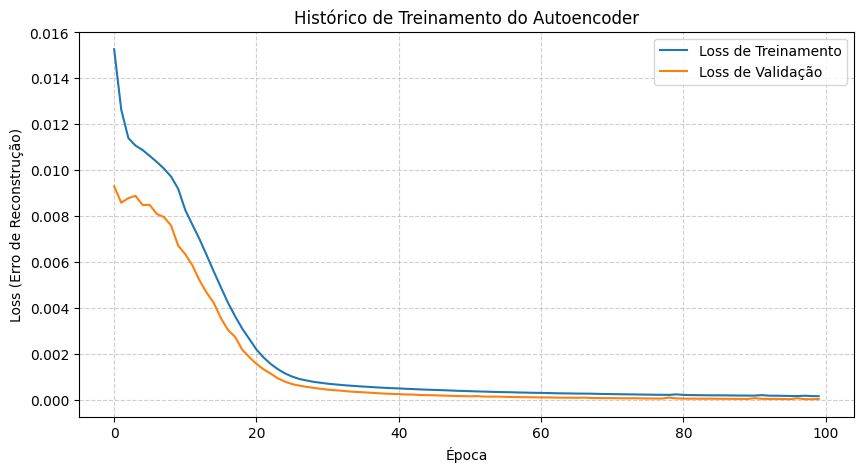

In [35]:
print("\n--- 3. Construindo o Autoencoder ---")

# Dimensões da entrada (1 característica: o retorno normalizado)
input_dim = scaled_returns.shape[1]
encoding_dim = 2 # Dimensão da camada de "bottleneck" (reduzindo para 2)

# Input Layer
input_layer = Input(shape=(input_dim,))

# Encoder (compressão)
encoder = Dense(8, activation="relu")(input_layer) # Camada oculta 1
encoder = Dense(4, activation="relu")(encoder)      # Camada oculta 2
encoder_output = Dense(encoding_dim, activation="relu")(encoder) # Bottleneck

# Decoder (reconstrução)
decoder = Dense(4, activation="relu")(encoder_output) # Camada oculta 3
decoder = Dense(8, activation="relu")(decoder)      # Camada oculta 4
decoder_output = Dense(input_dim, activation="sigmoid")(decoder) # Saída (sigmoid para normalização 0-1)

# Montar o modelo do Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder_output)

# Compilar o modelo
# 'mean_squared_error' é comum para reconstrução de dados contínuos
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

print("\n--- 4. Treinamento do Autoencoder ---")

# Usar EarlyStopping para evitar overfitting
# Monitora a loss de validação e para se não houver melhora
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10, # Espera 10 épocas sem melhora
                               restore_best_weights=True) # Volta aos melhores pesos

# O treinamento é feito nos próprios dados de retorno
# Dividimos em treino e validação para monitorar o overfitting
history = autoencoder.fit(scaled_returns, scaled_returns,
                          epochs=100, # Número máximo de épocas
                          batch_size=32,
                          validation_split=0.2, # 20% dos dados para validação
                          callbacks=[early_stopping],
                          verbose=1) # Mostrar o progresso do treinamento

# Plotar o histórico de loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Histórico de Treinamento do Autoencoder')
plt.xlabel('Época')
plt.ylabel('Loss (Erro de Reconstrução)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- 5. Detecção de Anomalias ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Primeiras 5 linhas com Erro de Reconstrução:
              Return  Scaled_Return  Reconstruction_Error
Date                                                     
2023-01-03 -0.025305       0.402749          4.010351e-05
2023-01-04  0.031782       0.750824          4.084270e-06
2023-01-05  0.036009       0.776598          3.611945e-05
2023-01-06 -0.005863       0.521297          5.007296e-07
2023-01-09  0.005476       0.590432          5.710649e-06

Limiar de erro de reconstrução para anomalias (99º percentil): 0.001262

Número total de anomalias detectadas: 7

Anomalias detectadas (data e retorno original):
              Return  Reconstruction_Error
Date                                      
2023-01-17  0.061564              0.003456
2023-08-23  0.053251              0.001323
2023-10-23 -0.066050              0.004355
2024-03-08 -0.091359              0.048885
2024-05-15 -0.060436              0.001286
2024-08-26 

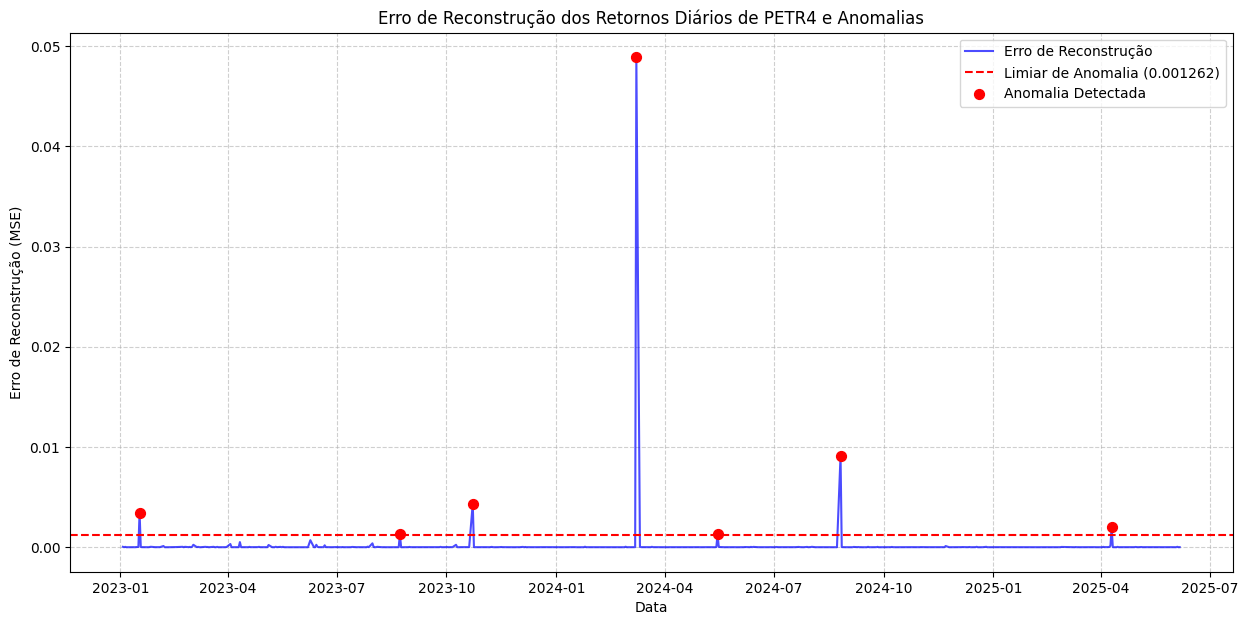

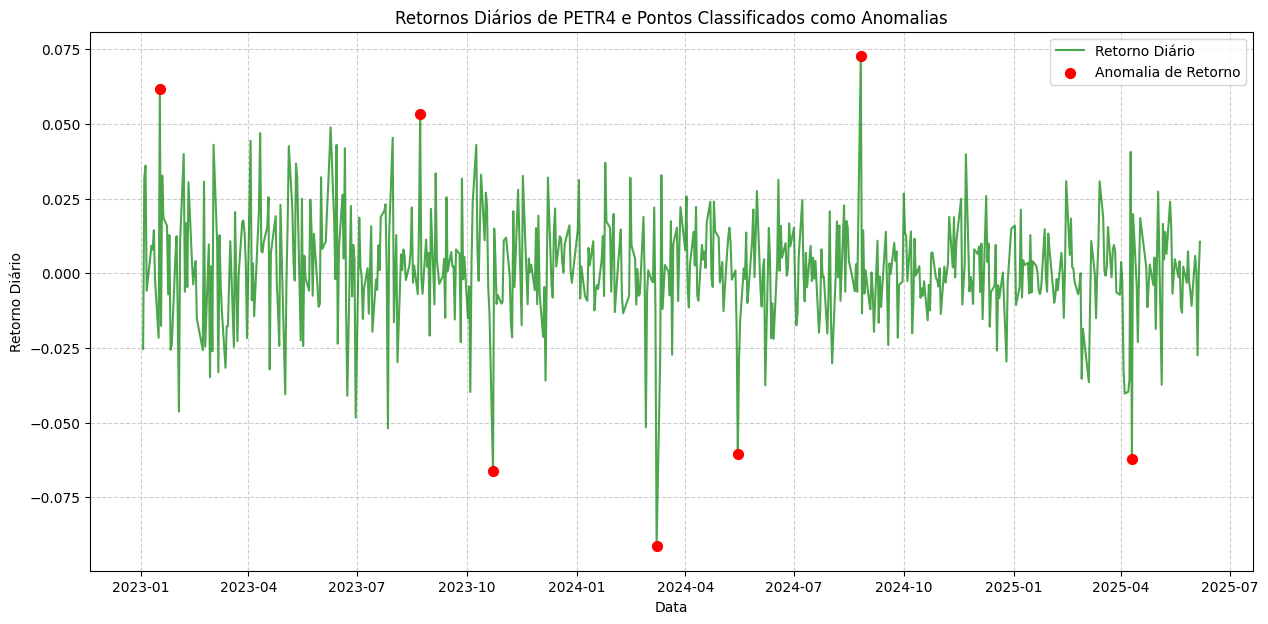

In [36]:
print("\n--- 5. Detecção de Anomalias ---")

# Fazer previsões (reconstruções) com o Autoencoder
reconstructions = autoencoder.predict(scaled_returns)

# Calcular o erro de reconstrução (MSE) para cada ponto de dado
mse = np.mean(np.power(scaled_returns - reconstructions, 2), axis=1)

# Adicionar o erro de reconstrução ao DataFrame original
df_returns['Reconstruction_Error'] = mse

print("Primeiras 5 linhas com Erro de Reconstrução:")
print(df_returns.head())

# --- Definir um Limiar para Anomalias ---
# Uma abordagem comum é usar a média + N*desvios padrão do erro de reconstrução
# Ou simplesmente um percentil alto (e.g., 95º ou 99º percentil)

# Usando o 99º percentil como limiar
threshold = np.percentile(df_returns['Reconstruction_Error'], 99)
print(f"\nLimiar de erro de reconstrução para anomalias (99º percentil): {threshold:.6f}")

# Marcar anomalias
df_returns['Is_Anomaly'] = df_returns['Reconstruction_Error'] > threshold

print(f"\nNúmero total de anomalias detectadas: {df_returns['Is_Anomaly'].sum()}")

# Exibir as anomalias detectadas
anomalies = df_returns[df_returns['Is_Anomaly']]
if not anomalies.empty:
    print("\nAnomalias detectadas (data e retorno original):")
    print(anomalies[['Return', 'Reconstruction_Error']])
else:
    print("\nNenhuma anomalia detectada acima do limiar.")

# Visualizar o erro de reconstrução e as anomalias
plt.figure(figsize=(15, 7))
plt.plot(df_returns.index, df_returns['Reconstruction_Error'], label='Erro de Reconstrução', color='blue', alpha=0.7)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Limiar de Anomalia ({threshold:.6f})')
plt.scatter(anomalies.index, anomalies['Reconstruction_Error'], color='red', s=50, zorder=5, label='Anomalia Detectada')
plt.title('Erro de Reconstrução dos Retornos Diários de PETR4 e Anomalias')
plt.xlabel('Data')
plt.ylabel('Erro de Reconstrução (MSE)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Visualizar os retornos com anomalias marcadas
plt.figure(figsize=(15, 7))
plt.plot(df_returns.index, df_returns['Return'], label='Retorno Diário', color='green', alpha=0.7)
plt.scatter(anomalies.index, anomalies['Return'], color='red', s=50, zorder=5, label='Anomalia de Retorno')
plt.title('Retornos Diários de PETR4 e Pontos Classificados como Anomalias')
plt.xlabel('Data')
plt.ylabel('Retorno Diário')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Limpar sessão Keras (opcional, para liberar memória em notebooks)
K.clear_session()